<a href="https://colab.research.google.com/github/Shreyas-S007/-Titanic-Survival-Prediction-using-Machine-Learning-in-Python/blob/main/Titanic_Survival_Prediction_using_Machine_Learning_in_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap lime scikit-learn matplotlib numpy pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=eeb7e96eb7305650461bae70e1b5ecb214ee7c89de91a567be41ab4835a4c22c
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import numpy as np
import pandas as pd
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# Load dataset (Modify this to load your actual dataset)
df = pd.read_csv("/content/Titanic_train.csv.csv")  # Update with your dataset path


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df = df.drop(columns='Cabin', axis=1)  #axis=0 reps row axis=1 reps col

In [ ]:
#replace missing value in age with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)  #inplace=True will replace in the csv file

<ipython-input-9-d397ba0d4e65>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)  #inplace=True will replace in the csv file


In [ ]:
# Embarked finding the mode value of this col
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
#replace the missing with s
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


<ipython-input-11-efc968479090>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# ppl survied or not from data
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived', ylabel='count'>

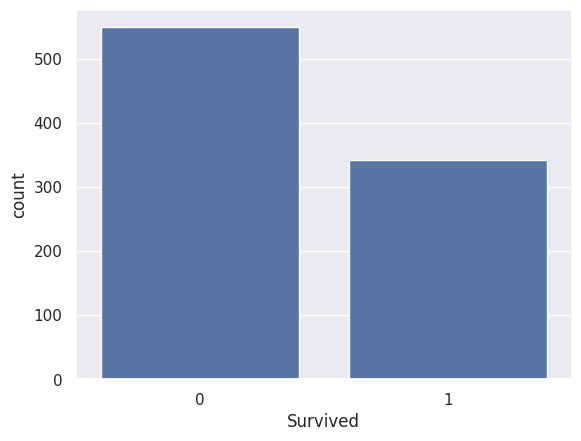

In [ ]:
sns.set()
#making count plot
sns.countplot(x='Survived', data=df) # Explicitly specify 'x'

<Axes: xlabel='Survived', ylabel='count'>

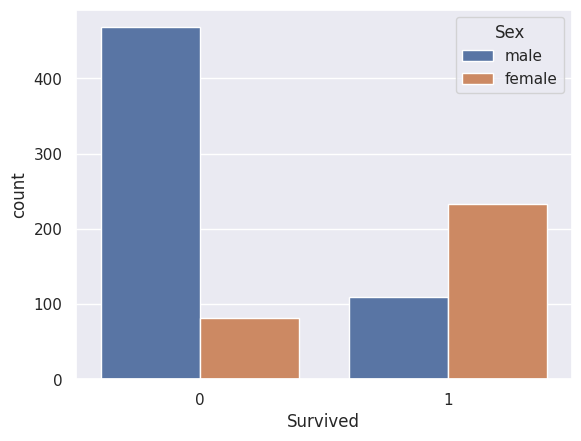

In [ ]:
#no of survvours gender wise
sns.countplot(x='Survived', data=df, hue='Sex')

In [ ]:
df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

<ipython-input-18-1d6e1589faa4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [ ]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)  #unnescary col
Y = df['Survived']

In [ ]:
print(X)
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [ ]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier()
}


In [ ]:
# Train models
for name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    print(f"{name} trained successfully.")

Logistic Regression trained successfully.
Random Forest trained successfully.
SVM trained successfully.
Gradient Boosting trained successfully.


In [ ]:
# Select a sample for explanation
sample_idx = 0  # Change as needed
sample = X_test_scaled[sample_idx].reshape(1, -1)

In [ ]:
# SHAP Explanation
st_model = models["Random Forest"]  # Choose a model
explainer = shap.Explainer(st_model, X_train_scaled)
shap_values = explainer(sample)


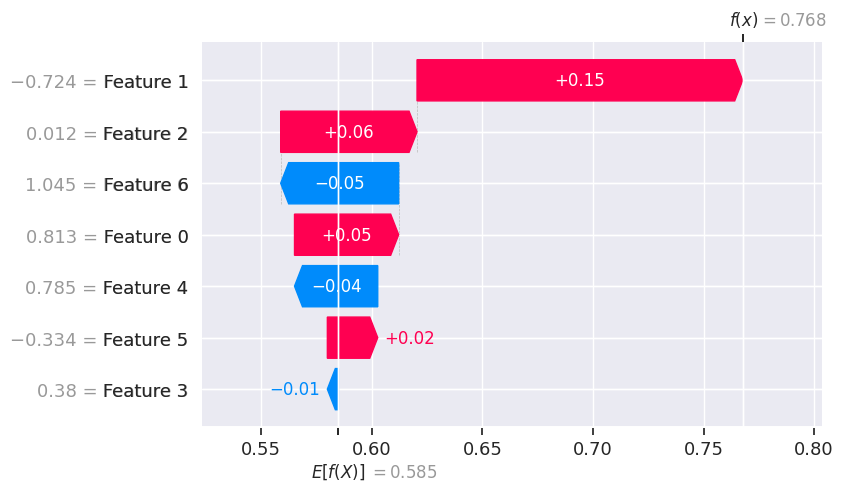

In [ ]:
plt.figure()
# Access the SHAP values for the first sample and the first class
shap.waterfall_plot(shap_values[0, :, 0])  # Assuming you want the first class explanation
plt.show()

In [ ]:
# LIME Explanation
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_scaled, feature_names=X.columns, class_names=["Class 0", "Class 1"], discretize_continuous=True)
lime_exp = explainer.explain_instance(sample[0], st_model.predict_proba)

<Figure size 640x480 with 0 Axes>

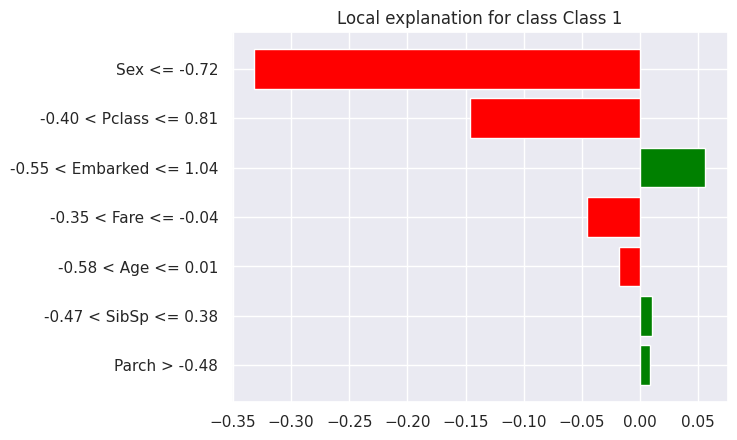

In [ ]:
plt.figure()
lime_exp.as_pyplot_figure()
plt.show()


In [ ]:
# Train models and compare accuracy
accuracies = {}
conf_matrices = {}

In [ ]:
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(Y_test, y_pred)
    conf_matrices[name] = confusion_matrix(Y_test, y_pred)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Print accuracy scores
print("Model Comparison:")
for model, acc in accuracies.items():
    print(f"{model}: {acc:.4f}")

Model Comparison:
Logistic Regression: 0.7989
Random Forest: 0.8212
SVM: 0.6536
Gradient Boosting: 0.8156


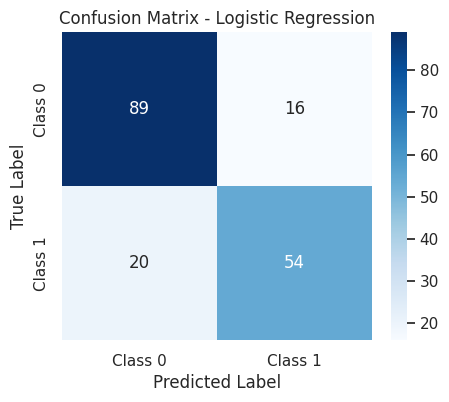

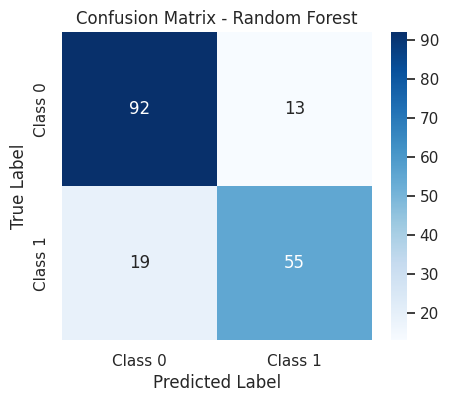

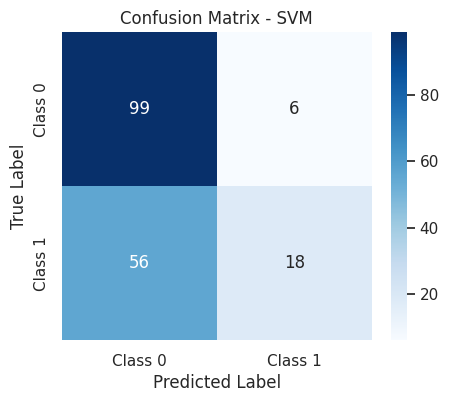

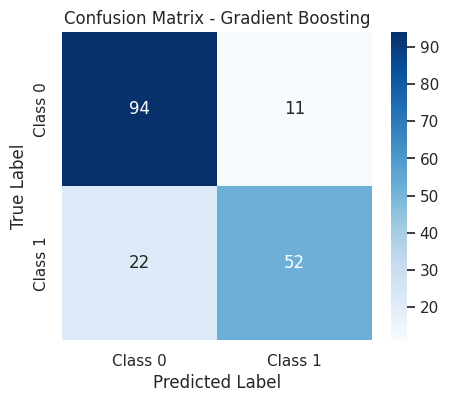

In [ ]:
# Plot confusion matrices for each model
for name, cm in conf_matrices.items():
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()